# 🐧 Logistic Regression with the Penguins Dataset

Welcome to today's lab session! 🎉

In this notebook, we will:
- Perform **Exploratory Data Analysis (EDA)** on the `penguins` dataset 🏝️
- Train a **Logistic Regression Model** to predict penguin sex 🐧

Let's get started! 🚀

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
penguins = sns.load_dataset('penguins')
penguins.head()  # Display first few rows

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Check for missing values
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# Drop rows with missing values
penguins = penguins.dropna()
penguins.isnull().sum()  # Verify missing values are gone

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

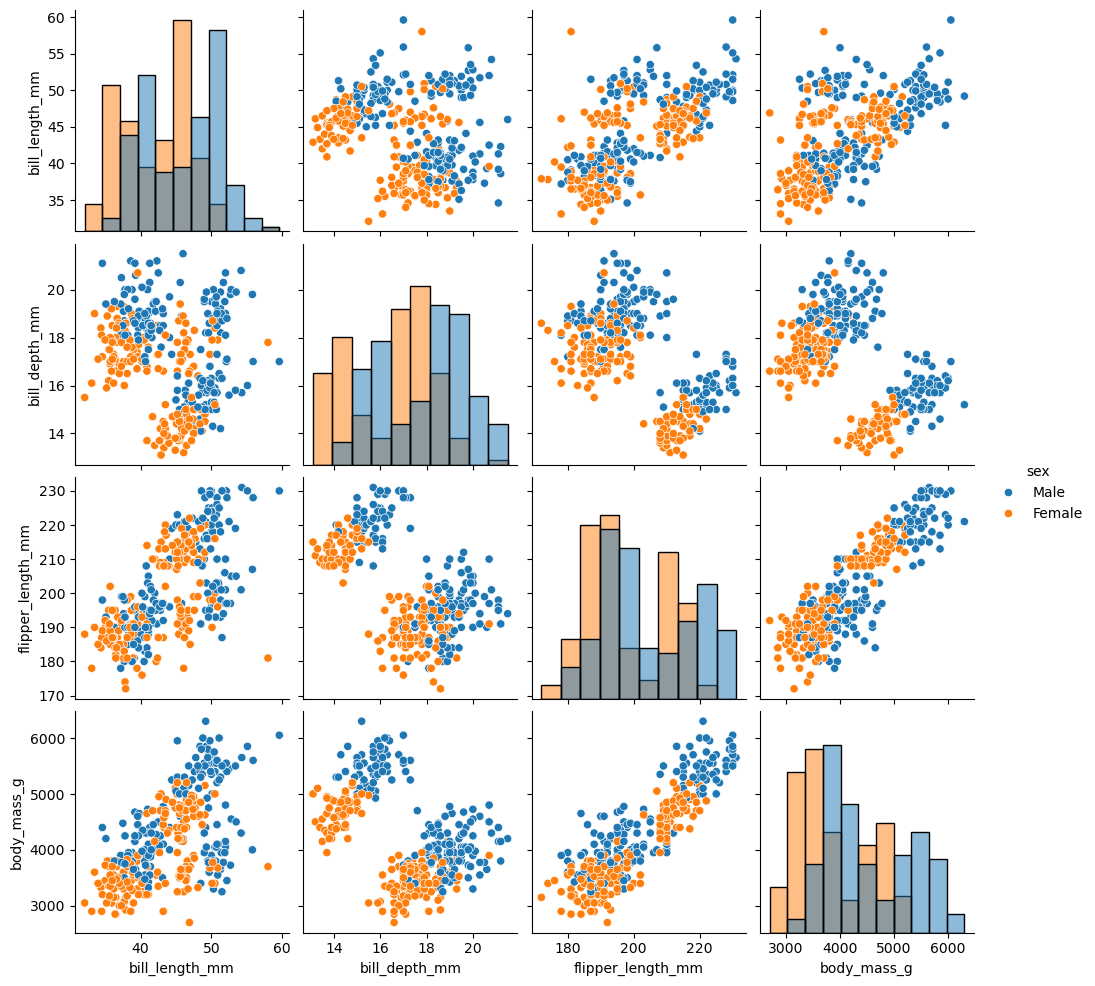

In [50]:
# Exploratory Data Analysis (EDA)
sns.pairplot(penguins, hue='sex', diag_kind='hist')
plt.show()

1️⃣ Modify and Expand EDA (15 min)
Task: Add at least two more visualizations to explore relationships.

Examples:

Does body mass vary significantly between species? (Hint: Use sns.boxplot) 📊

Do male and female penguins have different bill lengths? (Hint: Try sns.violinplot)

Goal: Think critically about which features might be useful for prediction! 🧠

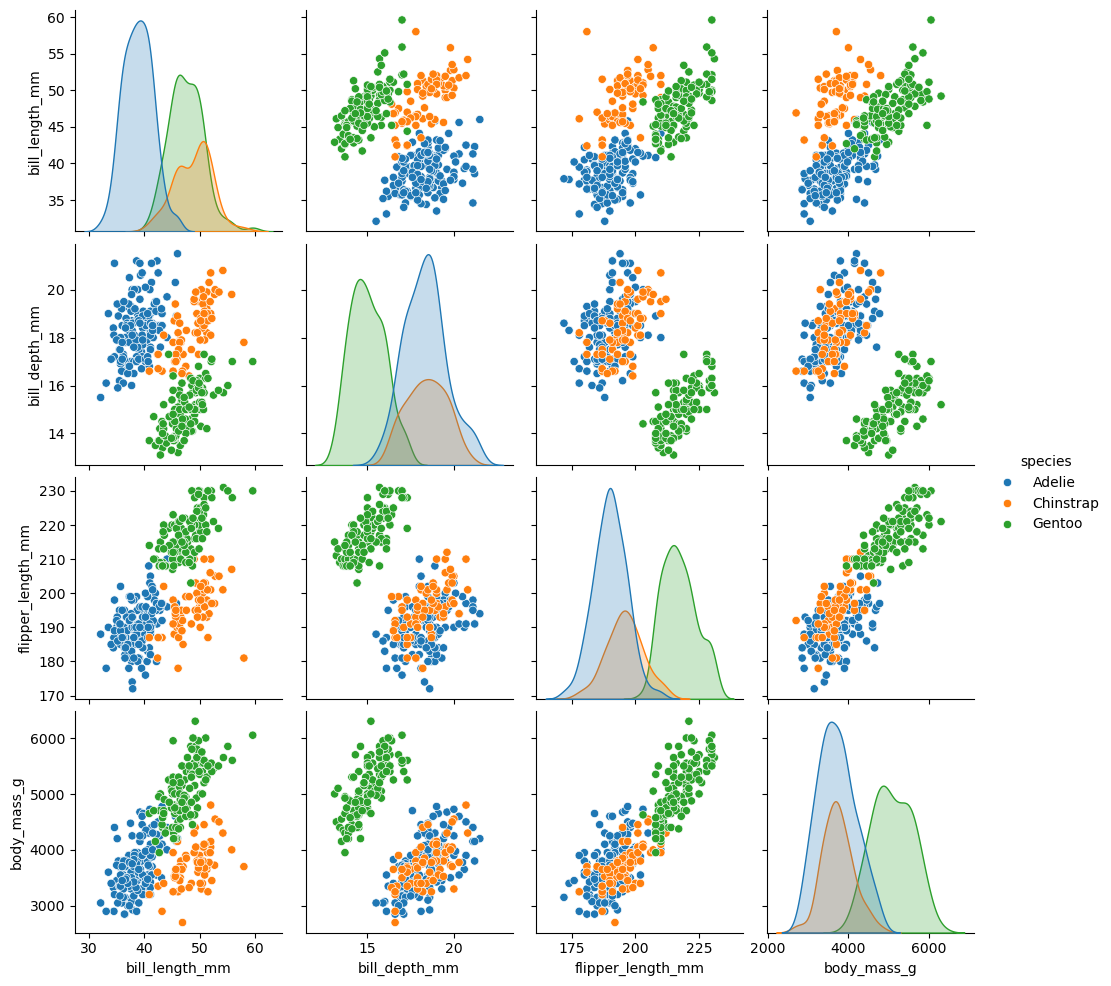

In [7]:
sns.pairplot(penguins, hue='species')

<Axes: xlabel='species', ylabel='body_mass_g'>

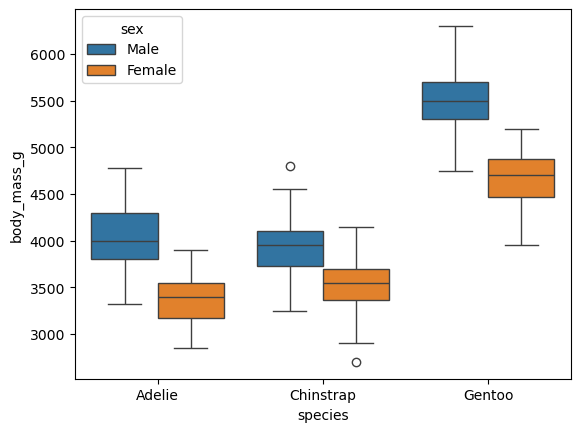

In [9]:
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='sex')

<Axes: xlabel='island', ylabel='bill_length_mm'>

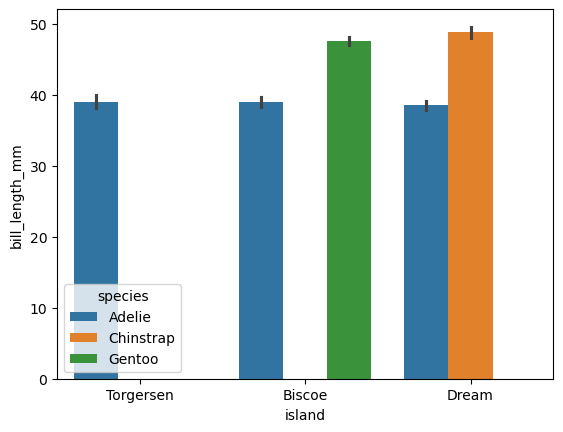

In [13]:
sns.barplot(data=penguins, x='island', y='bill_length_mm', hue='species')

In [20]:
# Encode categorical variables
le = LabelEncoder()
penguins['sex'] = le.fit_transform(penguins['sex'])  # Male=1, Female=0
penguins = pd.get_dummies(penguins, columns=['species', 'island'], drop_first=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,False,False,False,True
1,39.5,17.4,186.0,3800.0,0,False,False,False,True
2,40.3,18.0,195.0,3250.0,0,False,False,False,True
4,36.7,19.3,193.0,3450.0,0,False,False,False,True
5,39.3,20.6,190.0,3650.0,1,False,False,False,True


In [15]:
# Split data into training and testing sets
X = penguins.drop(columns=['sex'])  # Features
y = penguins['sex']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Model evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9104477611940298
Confusion Matrix:
 [[33  4]
 [ 2 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.88      0.93      0.90        30

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



 2️⃣ Feature Selection & Engineering (20 min)
Task: Try training the logistic regression model with different feature sets:

What happens if we remove body mass?

Does including island or species improve accuracy?

Goal: Understand how feature choices impact model performance! 🚀

### TARGET - SPECIES

In [24]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()

In [ ]:
penguins = pd.get_dummies(penguins, columns=['island'], drop_first=True)


In [35]:
X = penguins.drop(columns=['sex', 'species'])  # Drop 'species' as it belongs to y and 'sex' as it makes not much sense to predict species
y = penguins['species']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
model = LogisticRegression(random_state=43, max_iter=10000) # seting max_iter at 10000 as lower values were not enough to let the model converge
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=43)

In [30]:
# Model evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
Confusion Matrix:
 [[30  0  0]
 [ 1 10  0]
 [ 0  0 26]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        30
   Chinstrap       1.00      0.91      0.95        11
      Gentoo       1.00      1.00      1.00        26

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



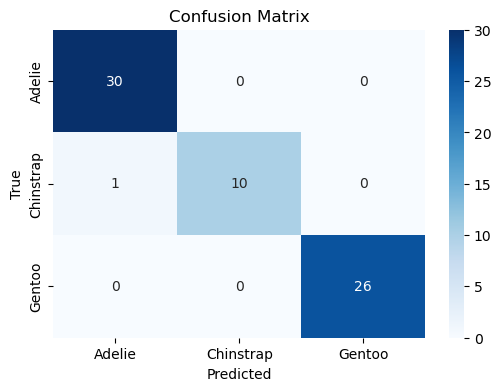

In [33]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
species_names = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names,
            yticklabels=species_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### EXPERIMENTING: REMOVING 'ISLAND' FROM X

In [43]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()

In [44]:
X = penguins.drop(columns=['sex', 'species', 'island'])
y = penguins['species']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [47]:
model = LogisticRegression(random_state=44, max_iter=5000) # seting max_iter at 10000 as lower values were not enough to let the model converge
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=44)

In [48]:
# Model evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
Confusion Matrix:
 [[27  1  0]
 [ 0 14  0]
 [ 0  0 25]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        28
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



3️⃣ Model Interpretation & Error Analysis (15 min)
Task: After training your model, interpret the results:

Which features had the most impact? 📊

Where did the model make the most mistakes? (Check confusion matrix) 🧐

Are male or female penguins harder to classify? Why? 🤔

Goal: Move beyond accuracy and think about real-world implications.

🔹 4️⃣ Challenge: Make a Small Change (Optional, 20 min)
Task: Modify the logistic regression model and justify the change:

Adjust solver or C parameter and observe the effect. 🛠️
(take time to google this to understand further)
Change the target variable (e.g., predict species instead of sex).

Goal: Get comfortable experimenting and defending your choices! 💡

✅ Final Deliverables
At the end of class or as homework, submit to google classroom:

A completed notebook with your modifications. 📂

A short written reflection answering:

What patterns did you find in the data? 🔍

What feature(s) were most useful for prediction? 🧩

If you could collect one extra feature, what would it be and why? 🤯